In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | portland
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | muzambinho
Processing Record 4 of Set 1 | aklavik
Processing Record 5 of Set 1 | quatre cocos
Processing Record 6 of Set 1 | gorin
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | pangnirtung
Processing Record 10 of Set 1 | gravdal
Processing Record 11 of Set 1 | belaya gora
Processing Record 12 of Set 1 | myitkyina
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | kargil
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | holbeach
Processing Record 19 of Set 1 | olafsvik
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rosarito
Processing Record 22 of Set 1 | oriximina
Processing Record 23 of Set 1 | west bay
Proce

Processing Record 39 of Set 4 | najran
Processing Record 40 of Set 4 | saint-jean-de-maurienne
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | namibe
Processing Record 43 of Set 4 | secovce
Processing Record 44 of Set 4 | sobolevo
Processing Record 45 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 46 of Set 4 | rafai
Processing Record 47 of Set 4 | haines junction
Processing Record 48 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 49 of Set 4 | souillac
Processing Record 50 of Set 4 | sao joao da barra
Processing Record 1 of Set 5 | lebanon
Processing Record 2 of Set 5 | birao
Processing Record 3 of Set 5 | kivsharivka
Processing Record 4 of Set 5 | senanga
Processing Record 5 of Set 5 | maracacume
Processing Record 6 of Set 5 | east london
Processing Record 7 of Set 5 | fevralsk
City not found. Skipping...
Processing Record 8 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 9 of Set 5 | nassjo
Proces

Processing Record 27 of Set 8 | matara
Processing Record 28 of Set 8 | mocorito
Processing Record 29 of Set 8 | iranshahr
Processing Record 30 of Set 8 | acapulco
Processing Record 31 of Set 8 | vestmannaeyjar
Processing Record 32 of Set 8 | rocha
Processing Record 33 of Set 8 | bardiyah
Processing Record 34 of Set 8 | coruripe
Processing Record 35 of Set 8 | alekseyevsk
Processing Record 36 of Set 8 | kumluca
Processing Record 37 of Set 8 | saint anthony
Processing Record 38 of Set 8 | cayenne
Processing Record 39 of Set 8 | talovaya
Processing Record 40 of Set 8 | healdsburg
Processing Record 41 of Set 8 | roald
Processing Record 42 of Set 8 | fortuna
Processing Record 43 of Set 8 | nome
Processing Record 44 of Set 8 | sibu
Processing Record 45 of Set 8 | eureka
Processing Record 46 of Set 8 | hambantota
Processing Record 47 of Set 8 | lodja
Processing Record 48 of Set 8 | lompoc
Processing Record 49 of Set 8 | nemuro
Processing Record 50 of Set 8 | ruteng
Processing Record 1 of Set 

Processing Record 14 of Set 12 | manica
Processing Record 15 of Set 12 | nyrob
Processing Record 16 of Set 12 | tanout
Processing Record 17 of Set 12 | kruisfontein
Processing Record 18 of Set 12 | sorong
Processing Record 19 of Set 12 | mergui
City not found. Skipping...
Processing Record 20 of Set 12 | naron
Processing Record 21 of Set 12 | dombarovskiy
Processing Record 22 of Set 12 | cannes
Processing Record 23 of Set 12 | aurich
Processing Record 24 of Set 12 | berlevag
Processing Record 25 of Set 12 | vilyuysk
Processing Record 26 of Set 12 | tabou
Processing Record 27 of Set 12 | moree
Processing Record 28 of Set 12 | ayan
Processing Record 29 of Set 12 | fuling
Processing Record 30 of Set 12 | palmer
Processing Record 31 of Set 12 | yar-sale
Processing Record 32 of Set 12 | flinders
Processing Record 33 of Set 12 | kabanga
Processing Record 34 of Set 12 | neosho
Processing Record 35 of Set 12 | shamary
Processing Record 36 of Set 12 | nienburg
Processing Record 37 of Set 12 | h

In [8]:
len(city_data)

571

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Portland,45.5234,-122.6762,52.84,94,75,1.01,US,2021-10-29 17:08:14
1,San Patricio,28.0170,-97.5169,77.41,16,0,18.19,US,2021-10-29 17:10:13
2,Muzambinho,-21.3758,-46.5256,73.62,72,92,3.42,BR,2021-10-29 17:10:13
3,Aklavik,68.2191,-135.0107,23.72,96,100,2.19,CA,2021-10-29 17:10:13
4,Quatre Cocos,-20.2078,57.7625,75.31,76,78,9.84,MU,2021-10-29 17:09:35
5,Gorin,51.1983,136.6669,32.50,89,11,4.61,RU,2021-10-29 17:10:14
6,Faanui,-16.4833,-151.7500,78.37,75,98,16.33,PF,2021-10-29 17:10:15
7,Albany,42.6001,-73.9662,55.35,72,9,3.00,US,2021-10-29 17:05:24
8,Pangnirtung,66.1451,-65.7125,32.00,100,90,4.61,CA,2021-10-29 17:10:15
9,Gravdal,68.1214,13.5031,39.09,93,40,2.30,NO,2021-10-29 17:10:16


In [10]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Portland,US,2021-10-29 17:08:14,45.5234,-122.6762,52.84,94,75,1.01
1,San Patricio,US,2021-10-29 17:10:13,28.0170,-97.5169,77.41,16,0,18.19
2,Muzambinho,BR,2021-10-29 17:10:13,-21.3758,-46.5256,73.62,72,92,3.42
3,Aklavik,CA,2021-10-29 17:10:13,68.2191,-135.0107,23.72,96,100,2.19
4,Quatre Cocos,MU,2021-10-29 17:09:35,-20.2078,57.7625,75.31,76,78,9.84
5,Gorin,RU,2021-10-29 17:10:14,51.1983,136.6669,32.50,89,11,4.61
6,Faanui,PF,2021-10-29 17:10:15,-16.4833,-151.7500,78.37,75,98,16.33
7,Albany,US,2021-10-29 17:05:24,42.6001,-73.9662,55.35,72,9,3.00
8,Pangnirtung,CA,2021-10-29 17:10:15,66.1451,-65.7125,32.00,100,90,4.61
9,Gravdal,NO,2021-10-29 17:10:16,68.1214,13.5031,39.09,93,40,2.30


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

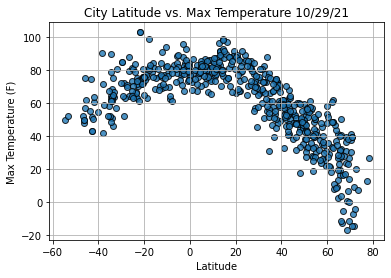

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

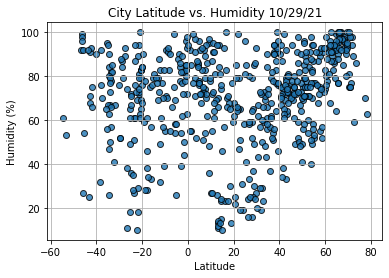

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

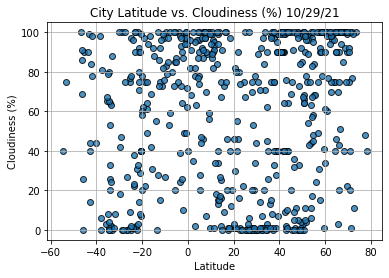

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

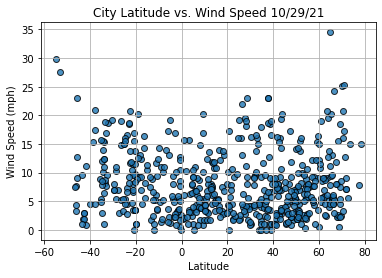

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Country                        US
Date          2021-10-29 17:10:18
Lat                       22.0752
Lng                      -159.319
Max Temp                    73.38
Humidity                       99
Cloudiness                     90
Wind Speed                   4.61
Name: 13, dtype: object

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Portland,US,2021-10-29 17:08:14,45.5234,-122.6762,52.84,94,75,1.01
1,San Patricio,US,2021-10-29 17:10:13,28.0170,-97.5169,77.41,16,0,18.19
3,Aklavik,CA,2021-10-29 17:10:13,68.2191,-135.0107,23.72,96,100,2.19
5,Gorin,RU,2021-10-29 17:10:14,51.1983,136.6669,32.50,89,11,4.61
7,Albany,US,2021-10-29 17:05:24,42.6001,-73.9662,55.35,72,9,3.00


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

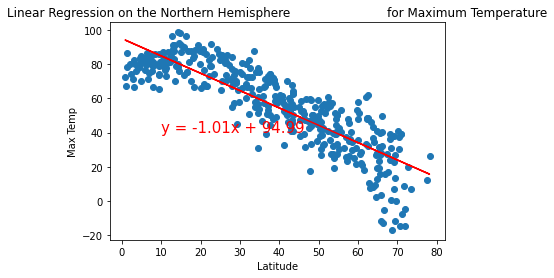

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

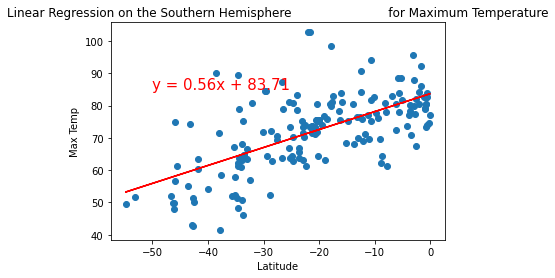

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

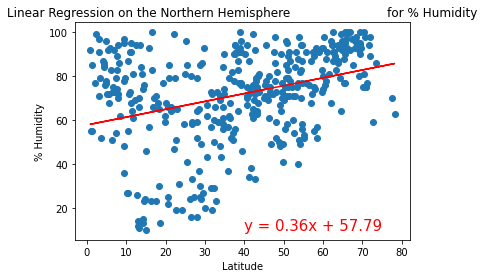

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

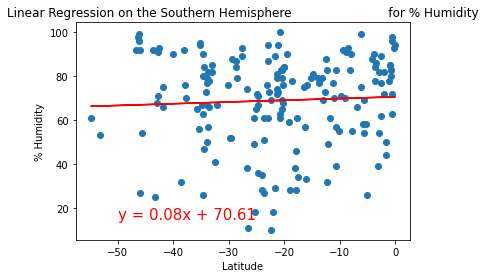

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

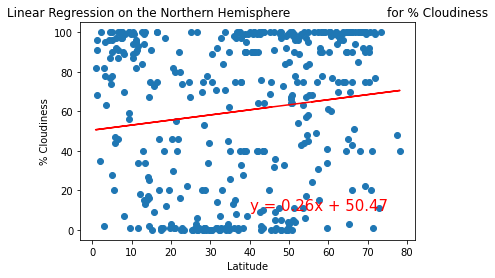

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

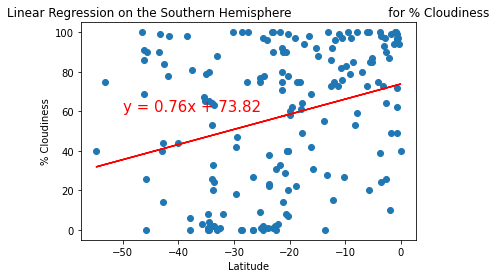

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

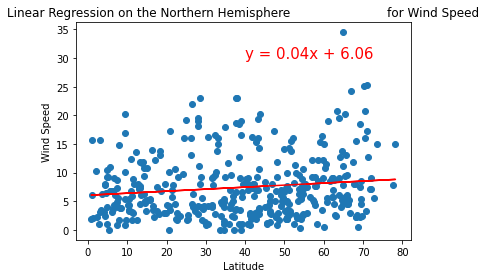

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

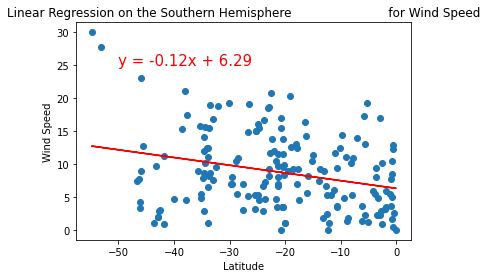

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

In [33]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = -0.12x + 6.29
The r-value is: -0.272
